### Packages

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import numpy as np
import csv
import string
import collections
import random
import pandas as pd
import plotnine as p9
import json

# Load Data

In [11]:
df = pd.read_csv('data/iowa_with_month.csv')
df.columns.tolist()

['store',
 'month',
 'longitude',
 'latitude',
 'city',
 'county',
 'liter',
 'bottles',
 'gross_profit',
 'cat_convenience_store',
 'cat_distillery_brewery',
 'cat_gas_station',
 'cat_general_store',
 'cat_grocery_store',
 'cat_liquor_store_bar',
 'cat_other',
 'cat_pharmacy',
 'cat_unknown',
 'pop_city',
 'fips',
 'pop_county',
 'female_18_24',
 'female_25_34',
 'female_35_44',
 'female_45_64',
 'female_65_over',
 'male_18_24',
 'male_25_34',
 'male_35_44',
 'male_45_64',
 'male_65_over',
 'annual_income',
 'excessive_drinking',
 'gassale_x_gasstore',
 'l_100_agave_tequila',
 'l_aged_dark_rum',
 'l_american_brandies',
 'l_american_cordials_liqueurs',
 'l_american_distilled_spirits_specialty',
 'l_american_dry_gins',
 'l_american_flavored_vodka',
 'l_american_schnapps',
 'l_american_sloe_gins',
 'l_american_vodkas',
 'l_blended_whiskies',
 'l_bottled_in_bond_bourbon',
 'l_canadian_whiskies',
 'l_cocktails_rtd',
 'l_coffee_liqueurs',
 'l_corn_whiskies',
 'l_cream_liqueurs',
 'l_flavore

In [12]:
X = df.drop(columns=[
    'store', 'longitude', 'latitude', 'city', 'county', 'liter', 'bottles',
    'gross_profit', 'pop_city', 'fips', 'pop_county'
])
X

,month,cat_convenience_store,cat_distillery_brewery,cat_gas_station,cat_general_store,cat_grocery_store,cat_liquor_store_bar,cat_other,cat_pharmacy,cat_unknown,...,l_single_malt_scotch,l_special_order_items,l_spiced_rum,l_straight_bourbon_whiskies,l_straight_rye_whiskies,l_temporary_specialty_packages,l_tennessee_whiskies,l_triple_sec,l_whiskey_liqueur,l_white_rum
0,1,0,0,0,0,0,1,0,0,0,...,0.00,0.00,5.050,11.150,0.00,7.00,5.425,0.0,3.000,1.75
1,2,0,0,0,0,0,1,0,0,0,...,2.25,0.00,5.250,14.500,0.00,2.50,0.750,0.0,4.250,0.00
2,3,0,0,0,0,0,1,0,0,0,...,0.00,0.00,7.000,10.500,0.75,3.25,1.750,1.0,4.250,0.00
3,4,0,0,0,0,0,1,0,0,0,...,0.00,0.00,5.250,8.500,1.00,2.50,1.750,0.0,1.500,1.75
4,5,0,0,0,0,0,1,0,0,0,...,0.00,1.75,2.800,10.875,0.75,4.00,4.100,1.0,1.750,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23049,7,0,0,1,0,0,0,0,0,0,...,0.00,0.00,6.500,0.050,0.00,0.00,0.000,0.0,5.775,0.00
23050,9,0,0,1,0,0,0,0,0,0,...,0.00,0.00,0.000,0.000,0.00,0.00,0.000,0.0,2.600,0.00
23051,10,0,0,1,0,0,0,0,0,0,...,0.00,0.00,0.000,0.000,0.00,0.75,0.000,0.0,0.000,0.00
23052,11,0,0,1,0,0,0,0,0,0,...,0.00,0.00,0.375,0.750,0.00,0.00,0.000,0.0,0.000,0.00


In [30]:
X.columns.tolist()

['month',
 'cat_convenience_store',
 'cat_distillery_brewery',
 'cat_gas_station',
 'cat_general_store',
 'cat_grocery_store',
 'cat_liquor_store_bar',
 'cat_other',
 'cat_pharmacy',
 'cat_unknown',
 'female_18_24',
 'female_25_34',
 'female_35_44',
 'female_45_64',
 'female_65_over',
 'male_18_24',
 'male_25_34',
 'male_35_44',
 'male_45_64',
 'male_65_over',
 'annual_income',
 'excessive_drinking',
 'gassale_x_gasstore',
 'l_100_agave_tequila',
 'l_aged_dark_rum',
 'l_american_brandies',
 'l_american_cordials_liqueurs',
 'l_american_distilled_spirits_specialty',
 'l_american_dry_gins',
 'l_american_flavored_vodka',
 'l_american_schnapps',
 'l_american_sloe_gins',
 'l_american_vodkas',
 'l_blended_whiskies',
 'l_bottled_in_bond_bourbon',
 'l_canadian_whiskies',
 'l_cocktails_rtd',
 'l_coffee_liqueurs',
 'l_corn_whiskies',
 'l_cream_liqueurs',
 'l_flavored_gin',
 'l_flavored_rum',
 'l_gold_rum',
 'l_imported_brandies',
 'l_imported_cordials_liqueurs',
 'l_imported_distilled_spirits_spe

In [13]:
y = df['gross_profit']
y

0        4499.84
1        4598.18
2        4840.74
3        3828.55
4        4691.36
          ...   
23049    1773.04
23050     626.34
23051     653.52
23052     642.18
23053     691.86
Name: gross_profit, Length: 23054, dtype: float64

In [14]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=32)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.176, random_state=123)

# Training & Validation

## Number of Trees: 30

In [17]:
rmse_list_30 = []
for depth in [3, 5, 7, 10, 15, 20, 25]:
    forest = RandomForestRegressor(n_estimators=30, max_depth=depth, random_state=32)
    forest.fit(X_train, y_train)
    y_val_pred = forest.predict(X_val)
    mse = mean_squared_error(y_val, y_val_pred)
    rmse = np.sqrt(mse)
    rmse_list_30.append(rmse)
    print(f"Depth={depth}, RMSE={rmse:.2f}")

Depth=3, RMSE=6715.10
Depth=5, RMSE=5253.06
Depth=7, RMSE=4820.91
Depth=10, RMSE=4458.05
Depth=15, RMSE=4362.06
Depth=20, RMSE=4406.26
Depth=25, RMSE=4420.07


## Number of Trees: 50

In [18]:
rmse_list_50 = []
for depth in [3, 5, 7, 10, 15, 20, 25]:
    forest = RandomForestRegressor(n_estimators=50, max_depth=depth, random_state=32)
    forest.fit(X_train, y_train)
    y_val_pred = forest.predict(X_val)
    mse = mean_squared_error(y_val, y_val_pred)
    rmse = np.sqrt(mse)
    rmse_list_50.append(rmse)
    print(f"Depth={depth}, RMSE={rmse:.2f}")

Depth=3, RMSE=6670.89
Depth=5, RMSE=5189.33
Depth=7, RMSE=4658.50
Depth=10, RMSE=4318.01
Depth=15, RMSE=4220.18
Depth=20, RMSE=4177.99
Depth=25, RMSE=4201.78


## Number of Trees: 70

In [19]:
rmse_list_70 = []
for depth in [3, 5, 7, 10, 15, 20, 25]:
    forest = RandomForestRegressor(n_estimators=70, max_depth=depth, random_state=32)
    forest.fit(X_train, y_train)
    y_val_pred = forest.predict(X_val)
    mse = mean_squared_error(y_val, y_val_pred)
    rmse = np.sqrt(mse)
    rmse_list_70.append(rmse)
    print(f"Depth={depth}, RMSE={rmse:.2f}")

Depth=3, RMSE=6655.19
Depth=5, RMSE=5165.36
Depth=7, RMSE=4609.49
Depth=10, RMSE=4299.04
Depth=15, RMSE=4213.44
Depth=20, RMSE=4149.62
Depth=25, RMSE=4207.00


## Number of Trees: 100

In [20]:
rmse_list_100 = []
for depth in [3, 5, 7, 10, 15, 20, 25]:
    forest = RandomForestRegressor(n_estimators=100, max_depth=depth, random_state=32)
    forest.fit(X_train, y_train)
    y_val_pred = forest.predict(X_val)
    mse = mean_squared_error(y_val, y_val_pred)
    rmse = np.sqrt(mse)
    rmse_list_100.append(rmse)
    print(f"Depth={depth}, RMSE={rmse:.2f}")

Depth=3, RMSE=6618.24
Depth=5, RMSE=5140.77
Depth=7, RMSE=4587.70
Depth=10, RMSE=4259.98
Depth=15, RMSE=4166.04
Depth=20, RMSE=4131.99
Depth=25, RMSE=4167.69


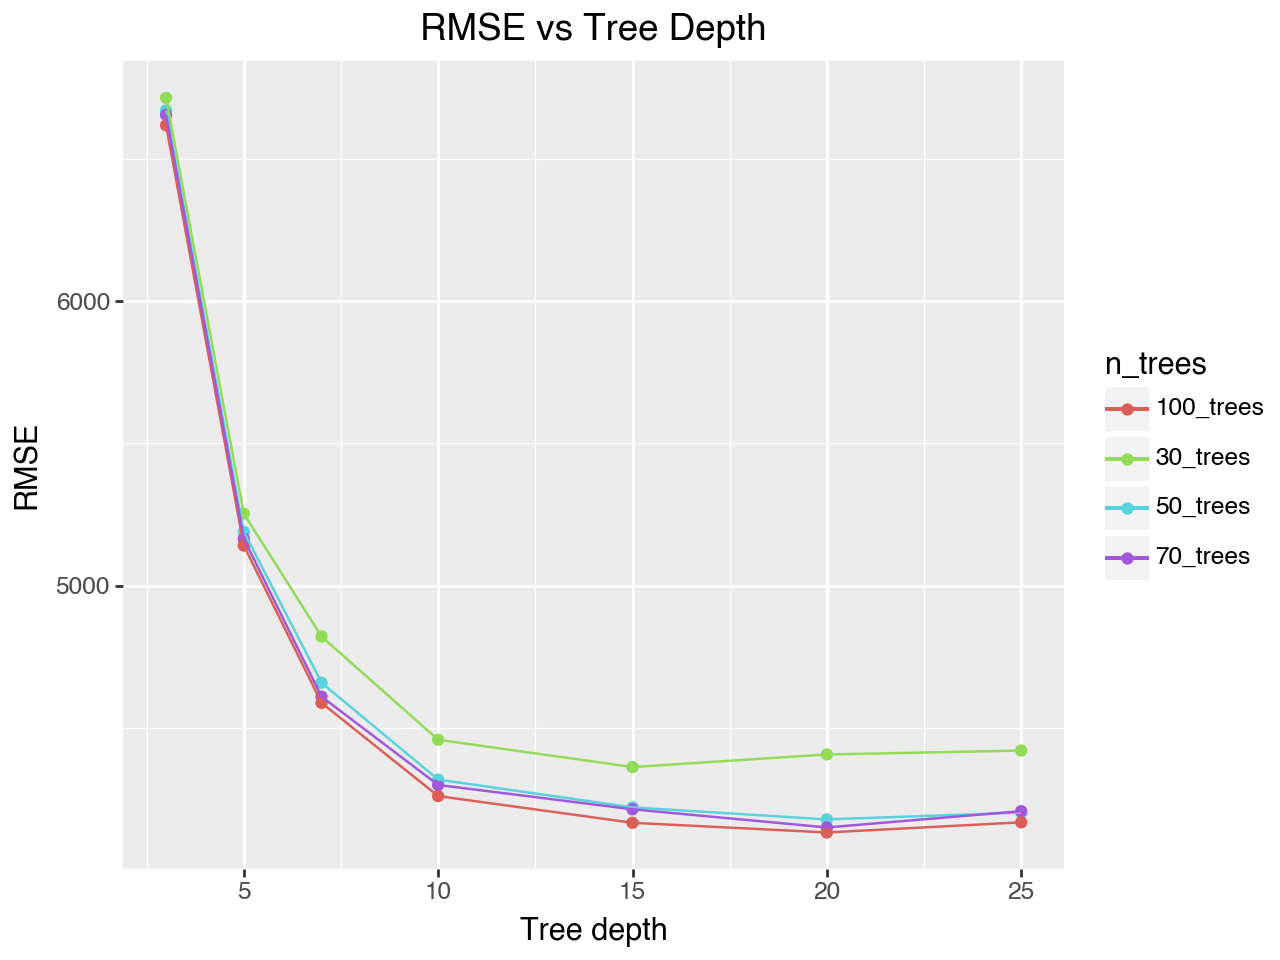

In [21]:
df_rmse = pd.DataFrame({
    'depth': [3, 5, 7, 10, 15, 20, 25],
    '30_trees': rmse_list_30,
    '50_trees': rmse_list_50,
    '70_trees': rmse_list_70,
    '100_trees': rmse_list_100,
})
df_rmse_long = pd.melt(df_rmse,
                       id_vars='depth',
                       var_name='n_trees',
                       value_name='rmse')
df_rmse_long.to_csv('table/rmse.csv', index=False)
plot = (
    p9.ggplot(df_rmse_long, p9.aes(x='depth', y='rmse', color='n_trees')) +
    p9.geom_point() +
    p9.geom_line() +
    p9.labs(title='RMSE vs Tree Depth',
            x='Tree depth',
            y='RMSE')
)
plot

# Test

In [22]:
forest_test = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=32)
forest_test.fit(X_train, y_train)
prediction = forest_test.predict(X_test)
prediction

array([ 1601.07786797,  2237.59214026,  1049.75989014, ...,
       30117.60276015,  2153.66603627,  4163.36836325], shape=(3459,))

In [25]:
df_importance = pd.DataFrame({
    'feat': X.columns,
    'importance': list(forest_test.feature_importances_)
})
df_importance = df_importance.reset_index(drop=True)
df_importance.to_csv('table/feat_importance_liquor_type.csv', index=False)
# df_importance_dict = df_importance.to_dict(orient='records')
# with open('table/feat_importance.json', 'w') as f:
#     json.dump(df_importance_dict, f, indent=2)

In [26]:
rmse_test = np.sqrt(mean_squared_error(y_test, prediction))
print(f"RMSE: {rmse_test:.2f}")

RMSE: 4134.16


In [27]:
df['gross_profit'].describe()

count     23054.000000
mean       6463.280572
std       17851.826561
min          10.750000
25%        1329.480000
50%        2424.515000
75%        5502.410000
max      499690.940000
Name: gross_profit, dtype: float64

In [28]:
summary = df['gross_profit'].describe()
with open('table/gross_profit_summary_liquor_type.json', 'w') as f:
    json.dump(summary.to_dict(), f, indent=2)

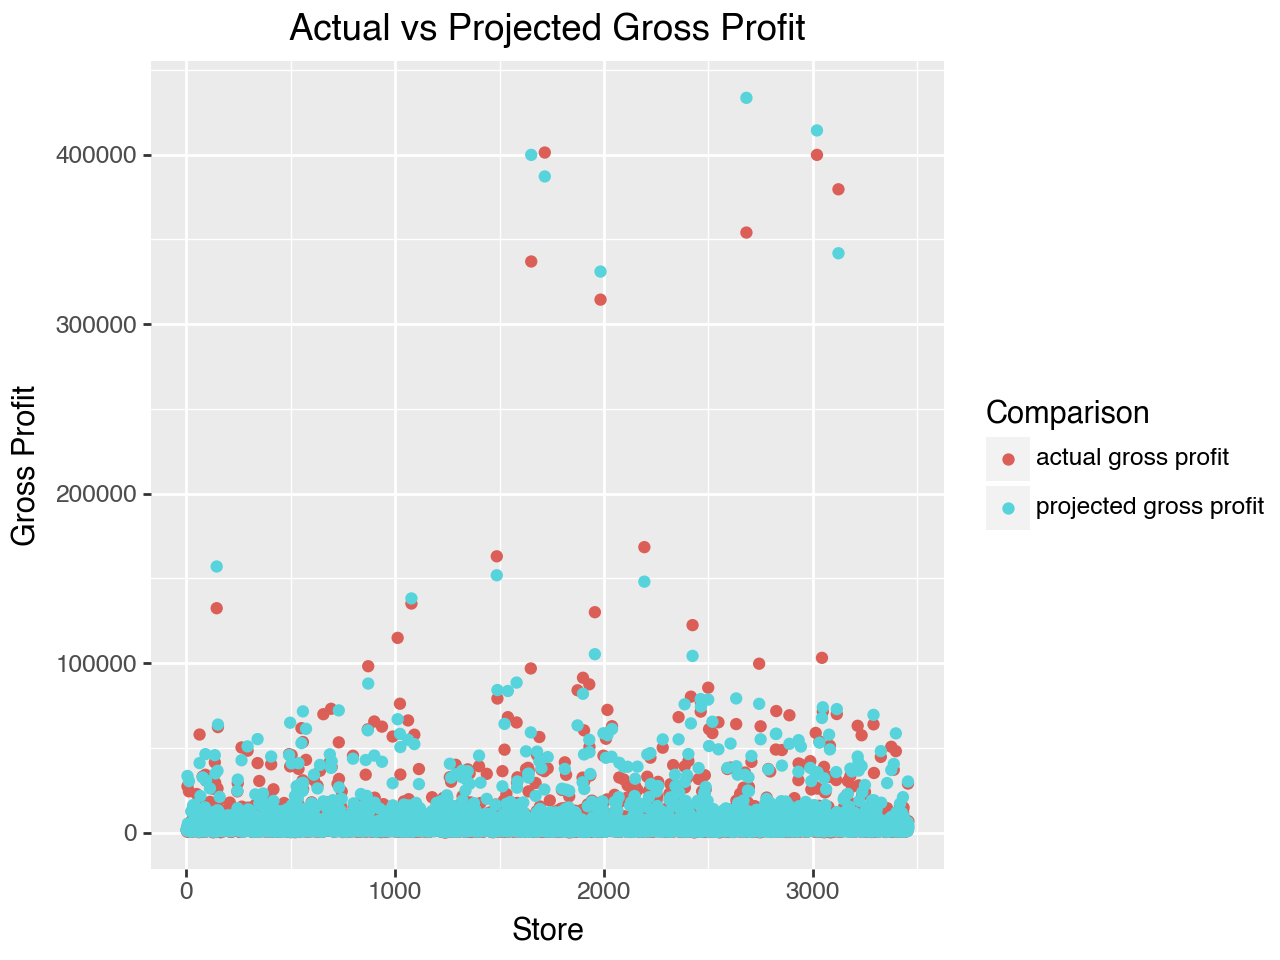

In [29]:
import pandas as pd
import plotnine as p9

df_diff = pd.DataFrame({
    'store': range(1, 3460),
    'actual gross profit': y_test,
    'projected gross profit': prediction
})

df_diff_long = pd.melt(
    df_diff,
    id_vars='store',
    var_name='comparison',
    value_name='gross_profit'
)

df_diff_long.to_csv('table/diff_actu_predi.csv', index=False)

plot = (
    p9.ggplot(df_diff_long, p9.aes(x='store', y='gross_profit', color='comparison')) +
    p9.geom_point() +
    p9.labs(title='Actual vs Projected Gross Profit',
            x='Store',
            y='Gross Profit',
            color='Comparison')
)
plot